In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

# Data Visiualization

In [2]:
df = pd.read_csv("Datasets/kindey_stone_urine_analysis.csv")
df.head()

,gravity,ph,osmo,cond,urea,calc,target
0,1.021,4.91,725,14.0,443,2.45,0
1,1.017,5.74,577,20.0,296,4.49,0
2,1.008,7.20,321,14.9,101,2.36,0
3,1.011,5.51,408,12.6,224,2.15,0
4,1.005,6.52,187,7.5,91,1.16,0


In [3]:
df.head()

,gravity,ph,osmo,cond,urea,calc,target
0,1.021,4.91,725,14.0,443,2.45,0
1,1.017,5.74,577,20.0,296,4.49,0
2,1.008,7.20,321,14.9,101,2.36,0
3,1.011,5.51,408,12.6,224,2.15,0
4,1.005,6.52,187,7.5,91,1.16,0


<AxesSubplot:xlabel='target', ylabel='calc'>

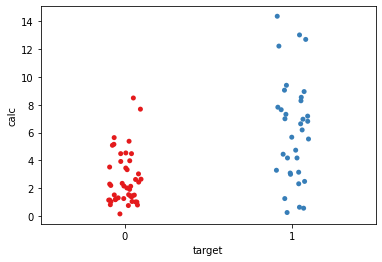

In [4]:
sns.stripplot(x="target", y="calc", data=df,jitter=True,palette='Set1')

<AxesSubplot:xlabel='target', ylabel='calc'>

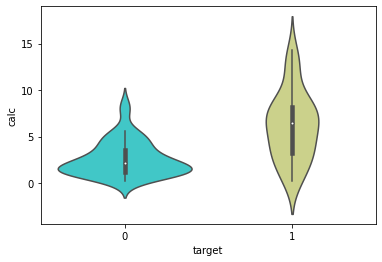

In [5]:
sns.violinplot(x="target", y="calc", data=df,palette='rainbow')

<AxesSubplot:xlabel='target', ylabel='calc'>

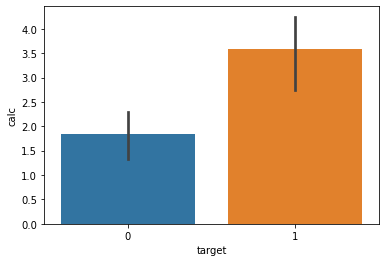

In [6]:
sns.barplot(x='target',y='calc',data=df, estimator=np.std)

# Preparing Dataset

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [8]:
scaled_features = scaler.fit_transform(df.drop(["target"], axis="columns"))
df_featured = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_featured.head()

,gravity,ph,osmo,cond,urea,calc
0,0.401206,-1.554076,0.475206,-0.863770,1.354036,-0.521397
1,-0.154851,-0.400830,-0.151894,-0.103177,0.226918,0.108359
2,-1.405980,1.627769,-1.236609,-0.749681,-1.268238,-0.549180
3,-0.988937,-0.720404,-0.867976,-1.041241,-0.325139,-0.614008
4,-1.823023,0.682942,-1.804390,-1.687745,-1.344912,-0.919624


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x=df_featured
y=df.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

In [11]:
x.head()

,gravity,ph,osmo,cond,urea,calc
0,0.401206,-1.554076,0.475206,-0.863770,1.354036,-0.521397
1,-0.154851,-0.400830,-0.151894,-0.103177,0.226918,0.108359
2,-1.405980,1.627769,-1.236609,-0.749681,-1.268238,-0.549180
3,-0.988937,-0.720404,-0.867976,-1.041241,-0.325139,-0.614008
4,-1.823023,0.682942,-1.804390,-1.687745,-1.344912,-0.919624


In [12]:
from sklearn.metrics import accuracy_score, classification_report

# Prediction Algorithms

In [13]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=3) 
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
accuracy_score(y_test, y_pred)

0.8125

In [14]:
error_rate = []
min_k = 0    # Minimum K value

# Will take some time
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    mean_errors = np.mean(pred_i != y_test)
    error_rate.append(mean_errors)
    if min(error_rate)==mean_errors:
        min_k = i

Text(0, 0.5, 'Error Rate')

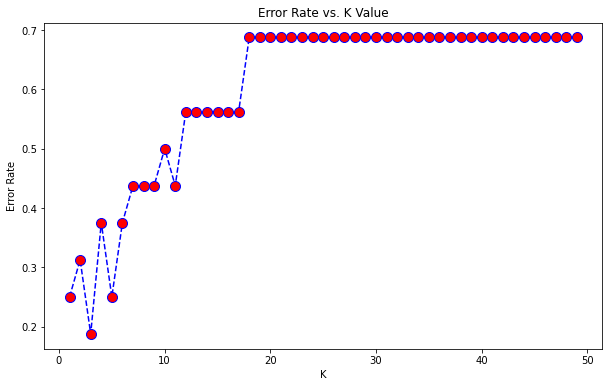

In [15]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [16]:
min_k

3

In [17]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       1.00      0.73      0.84        11

    accuracy                           0.81        16
   macro avg       0.81      0.86      0.81        16
weighted avg       0.88      0.81      0.82        16



# Decision Tree classifier

In [18]:
print('Decision Tree classifier') 
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
y_pred2 = clf.predict(x_test)
accuracy_score(y_test, y_pred2)

Decision Tree classifier


0.8125

# Logistic regression

In [19]:
print('Logistic regression') 
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression(random_state=12) 
lr.fit(x_train, y_train) 
y_pred3 = lr.predict(x_test)
accuracy_score(y_test, y_pred3)


Logistic regression


0.875

In [20]:
print('Random forest classifier') 
from sklearn.ensemble import RandomForestClassifier 
rf = RandomForestClassifier(random_state=22)   # random_state of 42 or 52 giving an outstanding 1 prediction accuracy
rf.fit(x_train, y_train) 
y_pred4 = rf.predict(x_test)
accuracy_score(y_test, y_pred4)

Random forest classifier


0.9375